# Homework 2: Pandas and Data Visualization
In this assignment you will use <b>Titanic</b> passenger data, that can be downloaded from here:

https://www.kaggle.com/c/titanic/data (download train.csv)

Answer the following questions in its cells.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read the titanic data file (csv)
titanic = pd.read_csv("titanic.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
#Q1 How many Titanic passengers are listed in the file? Hint: count()
titanic.PassengerId.count()

891

In [133]:
#Q2 How many male and how many female passengers? Hint: use groupby('Sex')
titanic[['PassengerId','Sex']].groupby('Sex').count()

,PassengerId
Sex,
female,314
male,577


In [134]:
#Q3 Who is the oldest passenger? Did he/she survive? Hint: use filter and max()
titanic[titanic.Age == titanic.Age.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


80 Year old Mr. Barkworth survived.

In [135]:
#Q4 Who is the youngest passenger? Did he/she survive? Hint: use filter and min()
titanic[titanic.Age == titanic.Age.min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


0.42 year old Thomas survived.

<Container object of 9 artists>

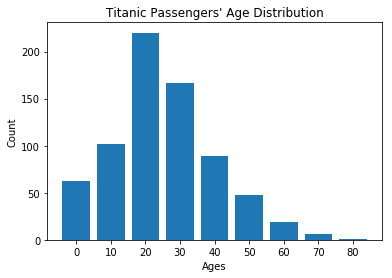

In [136]:
#Q5 Show the age distribution of passengers as a bar graph. Hint: use plt.bar
from collections import Counter
ages = [int(age) // 10 * 10 for age in titanic.Age if not pd.isnull(age)]
age_hist = Counter(ages)
plt.title('Titanic Passengers\' Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.xticks([x for x in age_hist.keys()])
plt.bar(age_hist.keys(),age_hist.values(),8)

Counter({20: 143, 30: 94, 10: 61, 40: 55, 50: 28, 0: 24, 60: 13, 70: 6})
Counter({20: 77, 30: 73, 10: 41, 0: 38, 40: 34, 50: 20, 60: 6, 80: 1})


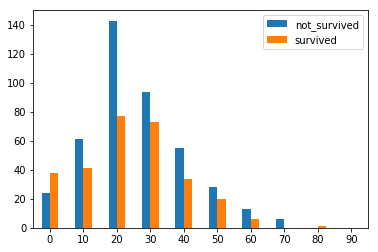

In [138]:
#Q6 Show the age distribution of passengers who survived as a bar graph.
#Hint: use pd.DataFrame.plot.bar
#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html
from collections import Counter
s_not_ages = [int(age) // 10 * 10 for age in titanic[titanic.Survived==0].Age if not pd.isnull(age)]
s_not_age_hist = Counter(s_not_ages)
print(s_not_age_hist)
s_ages = [int(age) // 10 * 10 for age in titanic[titanic.Survived==1].Age if not pd.isnull(age)]
s_age_hist = Counter(s_ages)
print(s_age_hist)
pd.DataFrame({'survived':[s_age_hist.get(x) for x in range(0,100,10)],
              'not_survived':[s_not_age_hist.get(x) for x in range(0,100,10)]}, 
             index=[x for x in range(0,100,10)]).plot.bar(rot=0)

Help: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

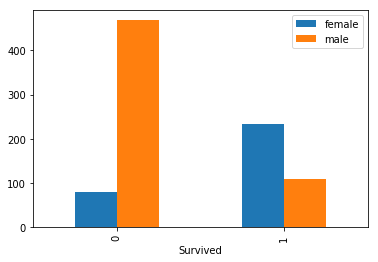

In [116]:
#Q7 Survival counts of women vs men as a bar graph
from collections import Counter

hist = titanic.groupby(['Sex','Survived'])['PassengerId'].count()
pd.DataFrame({'female':hist.female, 'male':hist.male}).plot.bar()


In [119]:
#Q8 What are the passenger class (Pclass) counts?
titanic.groupby(['Pclass','Survived'])['PassengerId'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

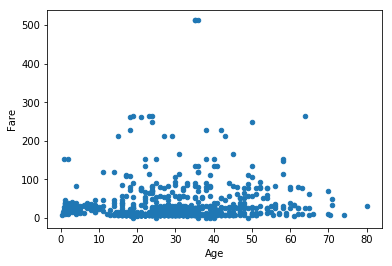

In [172]:
#Q9 Show the Fare vs Age scatter graph
titanic.plot.scatter(x='Age',y='Fare')

In [174]:
#Q10 The most common 20 names of the passengers?
# Create a list of all names (single words in the names), also remove the characters (.,())
list=[]
for n in [n for n in titanic.Name]:
    for w in n.split():
        list.append(w.replace('.','').replace(',','').replace('(','').replace(')',''))
# Create a Counter to count all words (names) in 'list'
cnt = Counter(list)
# Select the most common 20 names
d = cnt.most_common()[:20]
d

[('Mr', 517),
 ('Miss', 182),
 ('Mrs', 125),
 ('William', 62),
 ('John', 44),
 ('Master', 40),
 ('Henry', 34),
 ('James', 24),
 ('Charles', 23),
 ('George', 22),
 ('Thomas', 22),
 ('Mary', 18),
 ('Edward', 18),
 ('Anna', 17),
 ('Joseph', 16),
 ('Elizabeth', 15),
 ('Johan', 15),
 ('Frederick', 15),
 ('Richard', 14),
 ('Samuel', 13)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b69eba8>]], dtype=object)

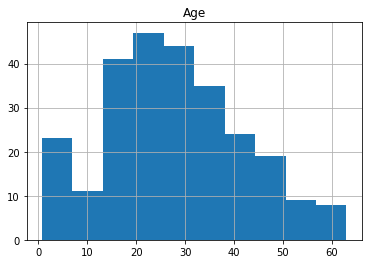

In [169]:
titanic[titanic.Sex=='female'][['Age']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bbb3a58>]], dtype=object)

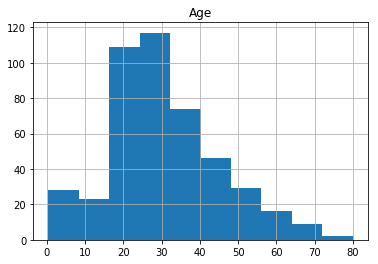

In [175]:
titanic[titanic.Sex=='male'][['Age']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf89198>]], dtype=object)

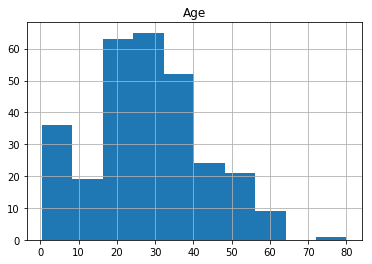

In [177]:
titanic[titanic.Survived==1][['Age']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf9b7b8>]], dtype=object)

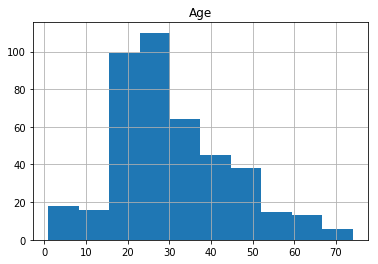

In [178]:
titanic[titanic.Survived==0][['Age']].hist()

In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.Survived.corr(titanic.Pclass)

-0.33848103596101536

In [8]:
sex_dict = {'male':0, 'female':1}

In [9]:
titanic['sex1'] = [sex_dict[x] for x in titanic.Sex]

In [11]:
titanic.Survived.corr(titanic.sex1)

0.5433513806577552